In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import requests
from bs4 import BeautifulSoup as bs

In [412]:
data = pd.read_csv('{project_#2_tools_data}_{ishay_telavivi}.csv', encoding ='ISO-8859-1')

In [413]:
data.head()

,Peak name,Continent,Country,Difficulty,Elevation (feet),Elevation (meters),Latitude,Longitude,Nearest major airport,Year first climbed
0,"19th Party Conference, Peak",asia,kyrgyzstan,basic snow/ice climb,5885,1794,39.3833,72.9667,osh,1930.0
1,"8620, Peak",north america,united states,technical climb,8620,2627,63.25,-150.25,fairbanks,NaN
2,A'Mhaighdean,europe,united kingdom,scramble,3173,967,57.7196,-5.3463,inverness,NaN
3,"Abbot, Mount",north america,united states,basic snow/ice climb,13704,4177,37.3864,-118.784,NaN,1908.0
4,Abbott Butte,north america,united states,NaN,6125,1867,42.943457,-122.549764,eugene airport,NaN


In [414]:
for col in ['Latitude', 'Longitude']:
    data.loc[:, col] = pd.to_numeric(data.loc[:, col], errors='coerce') # Using 'coerce' since I am reassigning the output
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4086 entries, 0 to 4085
Data columns (total 10 columns):
Peak name                4086 non-null object
Continent                4086 non-null object
Country                  4057 non-null object
Difficulty               3838 non-null object
Elevation (feet)         4086 non-null int64
Elevation (meters)       4086 non-null int64
Latitude                 3495 non-null float64
Longitude                3495 non-null float64
Nearest major airport    3771 non-null object
Year first climbed       1336 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 319.3+ KB


In [ ]:
# I identified that the 'Country' column has some nulls, while on the preprocessing it did not have. So I checked the dataframe 
# of the preprocessing, and indeed there were missing values but they were actually empty strings (''). My conclusion is that 
# they tuned into nulls on the transition to the csv, I also checked the csv to make sure.

In [415]:
# The following lines allow me to use the column index number for these columns when nessesary, for better clarity of the code.
# For example instead of writing '0' in iloc method, I am using these variables.
iloc_elevation = data.columns.get_loc('Elevation (meters)')
iloc_name = data.columns.get_loc('Peak name')

Q1: How many countries are listed?

In [416]:
n_countries = data['Country'].nunique()
print("There are {} countries listed.".format(n_countries))

There are 125 countries listed.


Q2: Which mountains from Israel are listed?

In [417]:
israel_mountain_list = list(data['Peak name'][data['Country'] == 'israel'].values)
# The following lines are for the printing
print("There are {} mountains listed from Israel:".format(len(israel_mountain_list)))
for mountain in israel_mountain_list:
    print(mountain)

There are 3 mountains listed from Israel:
Carmel, Mount
Masada
Meron, Har


Q3: Make a histogram of the peaks heights in Europe.

38.948684188300895


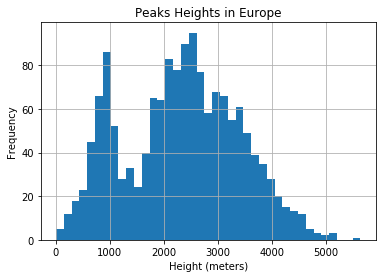

In [418]:
# The first line gives a Series of the elevation in meters of the european peaks 
eur_height_m = data['Elevation (meters)'][data['Continent'] == 'europe']
# Calculation the sqrt to determine the number of bins (thumb rule)
n_eur_peaks = len(eur_height_m)
print(math.sqrt(n_eur_peaks))
eur_hist = eur_height_m.hist(bins=39)
eur_hist.set_title('Peaks Heights in Europe')
eur_hist.set_xlabel('Height (meters)')
eur_hist.set_ylabel('Frequency')
plt.show()
# Add label and title

Q4: Which country has the highest number of peaks above 6000m

In [419]:
# First filter the data by all the peaks above 6000 m
peaks_above_6000 = data[data['Elevation (meters)'] > 6000]
# Then the value_counts gives me a sorted histogram by countries, and I am taking the first one
peaks_above_6000['Country'].value_counts().index[0]

'nepal'

Q5: Make a pie chart for the number of peaks in each continent.

In [420]:
# I am doing this in steps. First getting all the continents and the number of peaks in each
n_peaks_per_continent = data['Continent'].value_counts()
n_peaks_per_continent

north america        1525
europe               1517
asia                  513
south america         305
australia/oceania     146
africa                 68
antarctica             12
Name: Continent, dtype: int64

In [421]:
# I want the chart to have the continent names with uppercase on first letters
continents_names_upper = n_peaks_per_continent.index.str.title()
continents_names_upper

Index(['North America', 'Europe', 'Asia', 'South America', 'Australia/Oceania',
       'Africa', 'Antarctica'],
      dtype='object')

In [422]:
# I am using the total number of peaks to get later the absolut number per continent, because the hist default is percentage
total_n_peaks = data.shape[0]
total_n_peaks

4086

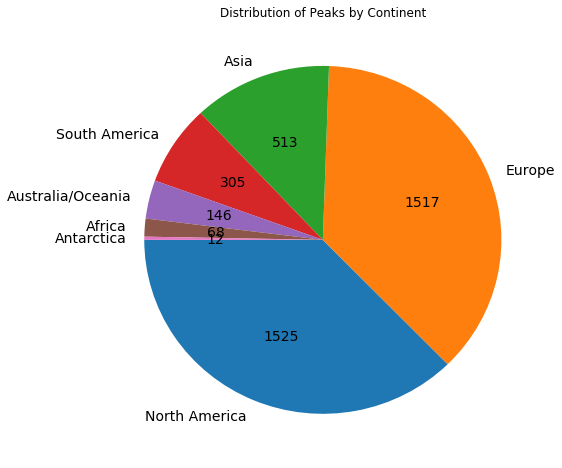

In [423]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.gca()
n_peaks_per_continent.plot.pie(ax = ax1, labels = continents_names_upper, startangle=180, legend = False, fontsize=14,\
                               autopct=lambda p: '{:.0f}'.format(p * sum_n_peaks_per_continent / 100))
plt.title('Distribution of Peaks by Continent')
plt.axis('off')
plt.show()

Q6: Sort the continents by their average peak height.

In [426]:
# I can do it in one line, but I am spliting it into two cells. First I get the mean heaight of each continent
mean_height_feet_by_continent = data.groupby('Continent')['Elevation (meters)'].mean().round()
# Then I sort it 
mean_height_feet_by_continent.sort_values(ascending=False)

Continent
asia                 4775.0
south america        4410.0
africa               3239.0
antarctica           2681.0
north america        2565.0
europe               2324.0
australia/oceania    1813.0
Name: Elevation (meters), dtype: float64

Q7: Find the highest mountain in each continent.

In [427]:
# First I make a groupby object per continent and elevation (meters)
elevation_meters_groupby_continent = data.groupby('Continent')['Elevation (meters)']
# Then I find the index of the highest mountain in each group (idxmax), and get its name, using the iloc_name I defined on the
# top of the notebook
for group, frame in elevation_meters_groupby_continent:
    peak_idx = frame.idxmax()
    peak_name = data.iloc[peak_idx, iloc_name]
    print("Highest peak in {} is {}.".format(group, peak_name))

Highest peak in africa is Kilimanjaro, Mount.
Highest peak in antarctica is Vinson Massif.
Highest peak in asia is Everest, Mount.
Highest peak in australia/oceania is Puncak Jaya.
Highest peak in europe is Elbrus, Mount.
Highest peak in north america is Denali.
Highest peak in south america is Aconcagua.


Q8: How many peaks are in “islands” countries? which is the highest of them

In [428]:
# Step 1 - get the 'island countries' from wikipedia
resp = requests.get('https://en.wikipedia.org/wiki/List_of_island_countries') 
soup = bs(resp.text, 'lxml')
table_soup = soup.find(name = 'table', class_ = "wikitable sortable") # Filters the soup only to the 'table' tag
trs_soup = table_soup.find_all(name='tr')
island_list = [tr.td.a.text for tr in trs_soup[1:]] # The first tr belongs to the header so I am excluding it
print(island_list)   

['Antigua and Barbuda', 'Australia', 'Bahamas', 'Bahrain', 'Barbados', 'Brunei Darussalam', 'Cape Verde', 'Comoros', 'Cuba', 'Cyprus', 'Dominica', 'Dominican Republic', 'East Timor', 'Federated States of Micronesia', 'Fiji', 'Grenada', 'Haiti', 'Iceland', 'Indonesia', 'Republic of Ireland', 'Jamaica', 'Japan', 'Kiribati', 'Madagascar', 'Maldives', 'Malta', 'Marshall Islands', 'Mauritius', 'Nauru', 'New Zealand', 'Northern Cyprus', 'Palau', 'Papua New Guinea', 'Philippines', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'São Tomé and Príncipe', 'Seychelles', 'Singapore', 'Solomon Islands', 'Sri Lanka', 'Taiwan', 'Tonga', 'Trinidad and Tobago', 'Tuvalu', 'United Kingdom', 'Vanuatu']


In [429]:
# Step 2 - there may be names that are not the same, so I'm cheking if I can find some matches
# First I am making a list of islands that their names are not in the 'Country' column in data
islands_without_data_list = []
for island in island_list: 
    if island.lower() not in set(data['Country']): # I added the lower() because I have only lowercase in 'Country' column
        islands_without_data_list.append(island)
        
# Then I am trying to see if there are island names "hiding" in the longer names in 'Country' column and vice versa
for country in set(data['Country']):
    if type(country) == str: # Making sure that I am wirking on strings
        for island in islands_without_data_list:
            # If a name from the 'Country' column is included within the name of the island:
            if country.title() in island:
                print(country)
                island_list.append(country) # I am appending the 'country' so that it will match the data
                islands_without_data_list.remove(island) # Now I know that the island has the data, so I remove it from this list
            # Now the other way - if an island name is included within a name in the 'Country' column:
            if island in country.title():
                print(country)
                island_list.append(country) # I am appending the 'country' so that it will match the data
                islands_without_data_list.remove(island) # Now I know that the island has the data, so I remove it from this list

# I found two islands with different names!!            

brunei
ireland


In [430]:
# Step 3 - get the highest peak of all islands and the number of peak on eahc island
islands_with_data_list = [] # List of tuples with the name of island and number of peaks (only to islands with data)
# The following 3 lines aim to capture the highest peak of all the islands
highest_peak_elevation_meters = 0
highest_peak_name = ''
island_with_highest_peak = ''
for island in island_list: 
    if island.lower() in set(data['Country']):
        n_peaks = data['Peak name'][data['Country'] == island.lower()].count() # number of peaks on each island
        islands_with_data_list.append((island, n_peaks))
        # Now I find the highest peak for this island
        idx_highest = data[data['Country'] == island.lower()]['Elevation (meters)'].idxmax() # Get the index of the peak
        highest_elevation_in_island = data.iloc[idx_highest, iloc_elevation] # Get the height of the peak
        # The following if expression checks if the height from the previous line is the greatest 
        # If it is it captures the name, height anf island of this peak
        if highest_elevation_in_island > highest_peak_elevation_meters:
            highest_peak_elevation_meters = highest_elevation_in_island
            highest_name_in_island = data.iloc[idx_highest,iloc_name]
            highest_peak_name = highest_name_in_island
            island_with_highest_peak = island
              
highest_peak_message = 'Highest peak of all islands is {} in {} with {} meters height.'
print(highest_peak_message.format(highest_peak_name, island_with_highest_peak, highest_peak_elevation_meters))
print()

# For printing I am sorting the islands by the number of peaks 
sorted_island_with_data = sorted(islands_with_data_list, key=lambda x: x[1], reverse=True)
for tup in sorted_island_with_data:
    print("Number of peaks in {} is {}.".format(tup[0], tup[1])) 
print()

print("The following islands countries are not in the data:")
for island in islands_without_data_list:        
    print(island) 

Highest peak of all islands is Puncak Jaya in Indonesia with 4884 meters height.

Number of peaks in United Kingdom is 175.
Number of peaks in Australia is 92.
Number of peaks in Philippines is 50.
Number of peaks in New Zealand is 37.
Number of peaks in Japan is 33.
Number of peaks in Indonesia is 20.
Number of peaks in ireland is 14.
Number of peaks in Iceland is 10.
Number of peaks in Papua New Guinea is 6.
Number of peaks in Trinidad and Tobago is 3.
Number of peaks in Dominica is 2.
Number of peaks in Dominican Republic is 2.
Number of peaks in Solomon Islands is 2.
Number of peaks in Sri Lanka is 2.
Number of peaks in Antigua and Barbuda is 1.
Number of peaks in Cuba is 1.
Number of peaks in Jamaica is 1.
Number of peaks in Taiwan is 1.
Number of peaks in Vanuatu is 1.
Number of peaks in brunei is 1.

The following islands countries are not in the data:
Bahamas
Bahrain
Barbados
Cape Verde
Comoros
Cyprus
East Timor
Federated States of Micronesia
Fiji
Grenada
Haiti
Kiribati
Madagas

Q9: Which country has the largest number of peaks listed? And per continent?

In [431]:
# I am making a sorted histogram by countries, and I am taking the first one
country_largest_n_peaks = data['Country'].value_counts().index[0]
print("The country with the largest number of peaks is {}.".format(country_largest_n_peaks))

# The same for the continents
continent_largest_n_peaks = data['Continent'].value_counts().index[0]
print("The continent with the largest number of peaks is {}.".format(continent_largest_n_peaks))

The country with the largest number of peaks is united states.
The continent with the largest number of peaks is north america.


Q10: What is the first mountain that was climbed in each century?

In [432]:
# Step 1  - add a column with the century
data['First century climbed'] = data['Year first climbed'] // 100 + 1
# Step 2 - getting the indices of the rows with the earliest year per century
idx = data.groupby(['First century climbed'])['Year first climbed'].transform(min) == data['Year first climbed']
data[idx].sort_values(by='First century climbed')

# Comment for the output of this question. As shown in the df below, for the 19th, 20th and 21st centuries, there were more than 
# one mountain that was first climbed on in the first year of the century. For example, there were two mountains that were 
# climbed on in the year 1900 (20th century): Edith Mount and Ballaberget

,Peak name,Continent,Country,Difficulty,Elevation (feet),Elevation (meters),Latitude,Longitude,Nearest major airport,Year first climbed,First century climbed
3455,Steens Mountain,north america,united states,walk up,9733,2967,42.683300,-118.550000,"boise,id or portland,or",1000.0,11.0
1641,Huanya Picchu,south america,peru,scramble,9100,2774,-13.150000,-72.533300,cuzco,1200.0,13.0
1003,Eagle Cap,north america,united states,walk up,9595,2925,45.150000,-117.300000,"lewiston, id.",1300.0,14.0
54,"Aiguille, Mont",europe,france,technical climb,6842,2085,44.833300,5.550000,"grenoble or lyon, france",1492.0,15.0
3098,Roseberry Topping,europe,united kingdom,walk up,1049,320,54.505400,-1.107300,durham tees valley,1500.0,16.0
3940,West Spanish Peak,north america,united states,walk up,13625,4153,37.366700,-104.983000,pueblo/colorado springs,1600.0,17.0
271,Bear Butte,north america,united states,walk up,4426,1349,44.475600,-103.426169,rapid city,1743.0,18.0
3068,Rocca Provenzale (Croce Provenzale),europe,italy,scramble,7881,2402,44.505423,6.921869,torino,1800.0,19.0
2786,Pico Oriental,south america,venezuela,walk up,8661,2640,10.537602,-66.839361,aeropuerto internacional simon bolivar,1800.0,19.0
3717,Torrone Di Nav,europe,switzerland,technical climb,9153,2790,NaN,NaN,agno/malpensa,1800.0,19.0


Q11: Of all the peaks with climbing difficulty “walk up”, which is the highest?

In [433]:
# First I am creating a view with only 'walks up', the sort by elevation, and then take onle the first peak and its features
data[data['Difficulty'] == 'walk up'].sort_values(by='Elevation (meters)', ascending=False).iloc[0,:]

Peak name                                 Haramosh Peak
Continent                                          asia
Country                                        pakistan
Difficulty                                      walk up
Elevation (feet)                                  24308
Elevation (meters)                                 7409
Latitude                                        35.8402
Longitude                                       74.8975
Nearest major airport    gilgit northern areas pakistan
Year first climbed                                 1958
First century climbed                                20
Name: 1500, dtype: object

Q12: How many peaks are there on the equator (no more than 1 degree away from it?)

In [434]:
# It can be done in one line, but I am breaking it.
# First filter a view of the peaks on the equator
peak_on_equator = data[(data['Latitude'] > -1) & (data['Latitude'] < 1)]
peak_on_equator

,Peak name,Continent,Country,Difficulty,Elevation (feet),Elevation (meters),Latitude,Longitude,Nearest major airport,Year first climbed,First century climbed
131,Antisana,south america,ecuador,technical climb,18,5,-0.481000,-78.141000,quito,1880.0,19.0
591,Cayambe,south america,ecuador,basic snow/ice climb,18996,5790,0.025105,-77.989197,"quito, ecuador",1880.0,19.0
682,Chiles (Volcan),south america,ecuador,walk up,15577,4748,0.816995,-77.936926,quito,NaN,NaN
807,Corazón,south america,ecuador,scramble,15715,4790,-0.531199,-78.659706,quito,NaN,NaN
826,Cotopaxi,south america,ecuador,basic snow/ice climb,19347,5897,-0.680556,-78.437778,"quito, ecuador",1872.0,19.0
1084,"Emin, Mount",africa,"congo, democratic republic of the",technical climb,15740,4798,0.433333,29.900000,"kampala, uganda, kigali, rwanda, bujumbura, ...",1906.0,20.0
1209,Fuya Fuya,south america,ecuador,walk up,13986,4263,0.133510,-78.293853,aeropuerto internacional mariscal sucre (quito),NaN,NaN
1261,"Gessi, Mount",africa,"congo, democratic republic of the",scramble,15470,4715,0.433333,29.916700,"kampala, uganda, kigali, rwanda, bujumbura, ...",1906.0,20.0
1416,Guagua Pichincha,south america,ecuador,walk up,15695,4784,-0.177068,-78.598766,quito,NaN,NaN
1680,Iliniza Sur,south america,ecuador,technical climb,17218,5248,-0.659444,-78.713611,quito,1880.0,19.0


In [435]:
# Then getting the number of peaks
n_peak_on_equator = peak_on_equator['Peak name'].count()
print("There are {} peaks on the equator.".format(n_peak_on_equator))

There are 26 peaks on the equator.


Q13: Find the highest peak for each combination of continent and difficulty.

In [436]:
# First I find the original indices of all the relevant rows (highest peak per combinaiton)
idx = data.groupby(['Continent','Difficulty'])['Elevation (meters)'].transform(max) == data['Elevation (meters)']
# Then I create a view of the data with these indices, setting the index for Continent and Difficulty for better visualization
# and sort the index
data[idx].set_index(['Continent','Difficulty']).sort_index()

Peak name  \
Continent         Difficulty                                                  
africa            basic snow/ice climb                           Margherita   
                  scramble                                          Mawenzi   
                  technical climb                              Kenya, Mount   
                  walk up                                Kilimanjaro, Mount   
antarctica        basic snow/ice climb                        Erebus, Mount   
                  major mountain expedition                   Vinson Massif   
                  scramble                               Kirkpatrick, Mount   
                  technical climb                               Mariën Peak   
asia              basic snow/ice climb             Imeni Ismail Samani, Pik   
                  major mountain expedition                  Everest, Mount   
                  scramble                                          Kalindi   
                  technical climb                             Baraha Shikar   
                  walk up                                     Haramosh Peak   
australia/oceania basic snow/ice climb                    Aoraki/Mount Cook   
                  major mountain expedition  Mount Bangeta, Mount Salawaket   
                  scramble                                      Puncak Jaya   
                  technical climb                           Aspiring, Mount   
                  walk up                                     Giluwe, Mount   
europe            basic snow/ice climb                        Elbrus, Mount   
                  major mountain expedition            Shota Rustaveli Peak   
                  scramble                                        Bazarduzu   
                  technical climb                                  Dykh-Tau   
                  walk up                                  Klein Matterhorn   
north america     basic snow/ice climb                       Foraker, Mount   
                  major mountain expedition                          Denali   
                  scramble                                           Téyotl   
                  technical climb                                 King Peak   
                  walk up                                      Iztaccihuatl   
south america     basic snow/ice climb                            Huascaran   
                  major mountain expedition                       Aconcagua   
                  scramble                                       Tocorpurri   
                  technical climb                                  Yerupaja   
                  walk up                                   Ojos del Salado   

                                                      Country  \
Continent         Difficulty                                    
africa            basic snow/ice climb                 uganda   
                  scramble                           tanzania   
                  technical climb                       kenya   
                  walk up                            tanzania   
antarctica        basic snow/ice climb             antarctica   
                  major mountain expedition        antarctica   
                  scramble                         antarctica   
                  technical climb                  antarctica   
asia              basic snow/ice climb             tajikistan   
                  major mountain expedition             nepal   
                  scramble                              india   
                  technical climb                       nepal   
                  walk up                            pakistan   
australia/oceania basic snow/ice climb            new zealand   
                  major mountain expedition  papua new guinea   
                  scramble                          indonesia   
                  technical climb                 new zealand   
                  walk up                    papua new guinea   
